<a href="https://colab.research.google.com/github/AVI18794/NLP/blob/master/TEXT_CLASSIFICATION_EXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
#Load the filenames and data from 20 newsgroups dataset
twenty_train = fetch_20newsgroups(subset='train',shuffle=True,download_if_missing=True)
twenty_test = fetch_20newsgroups(subset='test',shuffle=True,download_if_missing=True)

In [0]:
#Check what is the dataset all about
print(twenty_train.DESCR)

In [7]:
twenty_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [8]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
#Extracting features from text
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(f'Shape of Term Frequency Matrix:{X_train_counts.shape}')

Shape of Term Frequency Matrix:(11314, 130107)


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f'Shape of TFIDF Matrix :{X_train_tfidf.shape}')

Shape of TFIDF Matrix :(11314, 130107)


In [12]:
#Building Models
#Training Naive Bayes Model(classifier) on training data
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,twenty_train.target)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#Building a pipeline 
text_nb_clf = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])
text_nb_clf = text_nb_clf.fit(twenty_train.data,twenty_train.target)

In [0]:
#Predict the result
predictions = text_nb_clf.predict(twenty_test.data)
naivebayes_clf_accuracy = np.mean(predictions==twenty_test.target)*100


In [16]:
print(f'Test Accuracy is {naivebayes_clf_accuracy} %')


Test Accuracy is 77.38980350504514 %


In [0]:
from sklearn.linear_model import LogisticRegression as LR

In [18]:
%%time
text_lr_clf = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data,twenty_train.target)


CPU times: user 1min 15s, sys: 33.1 s, total: 1min 48s
Wall time: 1min 3s


In [22]:
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy =  np.mean(lr_predicted==twenty_test.target)*100
print(f'Test Accuracy is {lr_clf_accuracy} %')

Test Accuracy is 82.74030801911843 %


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
cf = confusion_matrix(y_true=twenty_test.target,y_pred = lr_predicted)
# print(cf)

In [0]:
clr = classification_report(y_true=twenty_test.target,y_pred=lr_predicted)
# clr

In [28]:
import json
print(json.dumps(cf.tolist(),indent=2))

[
  [
    237,
    2,
    0,
    0,
    1,
    1,
    4,
    0,
    3,
    3,
    0,
    1,
    2,
    8,
    2,
    33,
    2,
    4,
    1,
    15
  ],
  [
    1,
    307,
    14,
    8,
    8,
    17,
    6,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    4,
    2,
    1,
    1,
    2,
    1
  ],
  [
    2,
    21,
    289,
    34,
    12,
    11,
    2,
    2,
    2,
    4,
    0,
    1,
    1,
    1,
    3,
    2,
    0,
    0,
    6,
    1
  ],
  [
    0,
    13,
    23,
    284,
    21,
    2,
    14,
    3,
    0,
    1,
    1,
    1,
    24,
    0,
    3,
    0,
    1,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    22,
    319,
    1,
    10,
    0,
    0,
    5,
    1,
    0,
    12,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    43,
    38,
    5,
    4,
    292,
    3,
    0,
    0,
    0,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

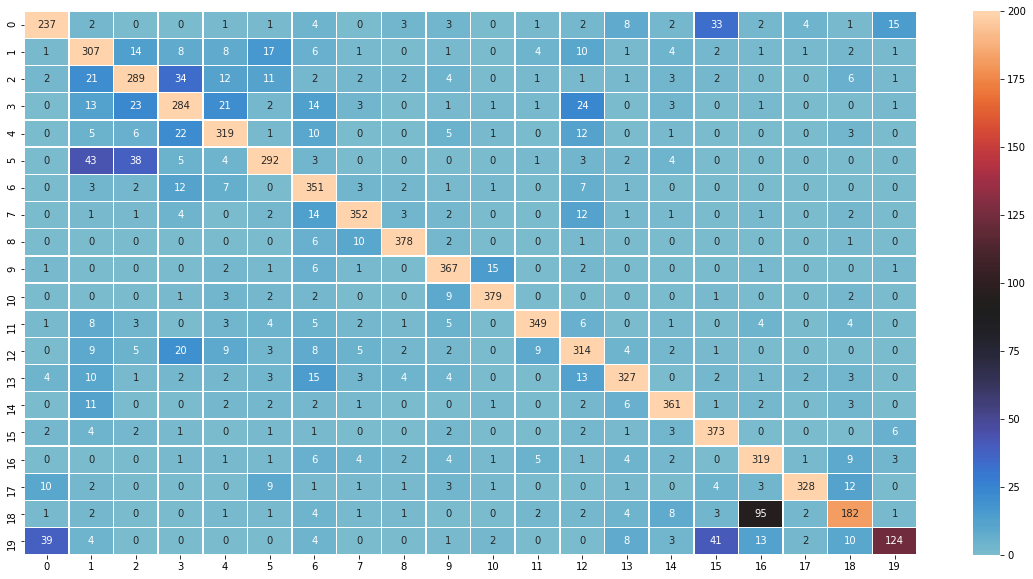

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf,annot=True,fmt='d',linewidth=.5,center=90,vmax=200)

In [0]:
#Removing the stopwords
import spacy
nlp = spacy.load('en_core_web_sm')

In [34]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'give', 'himself', 'neither', 'wherever', 'using', 'some', 'off', "'d", 'besides', 'somehow', 'yourselves', 'without', '‘m', 'could', 'either', 'namely', 'still', 'yourself', 'from', 'and', 'becoming', 'nor', 'therein', 'which', 'they', 'none', 'with', 'ours', 'in', 'alone', 'n’t', 'whom', 'eight', 'towards', 'you', 'only', 'though', 'whole', "'s", 'are', 'themselves', 'becomes', 'its', 'just', 'out', 'them', 'how', 'perhaps', 'nevertheless', 'between', 'nowhere', 'whereafter', 'per', 'almost', 'upon', 'hereafter', 'may', 'than', 'such', 'beside', 'thence', "'re", 'hereby', 'two', 'show', 'up', 'four', 'yours', 'here', 'most', 'next', 'has', 'on', 'hereupon', 'forty', 'except', 'make', "'ve", '‘re', 'eleven', 'the', 'to', 'five', 'while', 'hers', 'twenty', 'anyone', 'ca', 'down', 'fifty', 'above', 'ever', 'used', 'been', '’ll', 'her', 'last', 'third', 'as', 'others', 'see', 'noone', 'into', 'moreover', 'back', 'have', 'within', 'beyond', 'take', 'various', 'after', 'seem', 'latterly',

In [35]:
print(f'The length of stopwords in spacy is {len(STOP_WORDS)}')

The length of stopwords in spacy is 326


In [36]:
doc = nlp("I am learning the most important ideas Natural Language Processing ideas using python.")
print(doc)

I am learning the most important ideas Natural Language Processing ideas using python.


In [37]:
for token in doc:
  print(token)

I
am
learning
the
most
important
ideas
Natural
Language
Processing
ideas
using
python
.


In [38]:
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
simplified_doc

[learning, important, ideas, Natural, Language, Processing, ideas, python]

In [39]:
for token in simplified_doc:
  print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tParts-of-Speech-Tag:{token.pos_}')
  

Token:learning	Lemmatized:learn	Parts-of-Speech-Tag:VERB
Token:important	Lemmatized:important	Parts-of-Speech-Tag:ADJ
Token:ideas	Lemmatized:idea	Parts-of-Speech-Tag:NOUN
Token:Natural	Lemmatized:Natural	Parts-of-Speech-Tag:PROPN
Token:Language	Lemmatized:Language	Parts-of-Speech-Tag:PROPN
Token:Processing	Lemmatized:Processing	Parts-of-Speech-Tag:PROPN
Token:ideas	Lemmatized:idea	Parts-of-Speech-Tag:NOUN
Token:python	Lemmatized:python	Parts-of-Speech-Tag:NOUN


In [0]:
from spacy.lang.en import English
tokenizer = English().Defaults.create_tokenizer(nlp)
def spacy_tokenizer(document):
  return [token.orth_ for token in tokenizer(document)]
  

In [41]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf= text_lr_clf.fit(twenty_train.data,twenty_train.target)


CPU times: user 1min 16s, sys: 32.7 s, total: 1min 48s
Wall time: 1min 4s


In [0]:
def calc_print_accuracy(text_clf,test):
  predictions = text_clf.predict(test.data)
  clf_accuracy = np.median(predictions==test.target)*100
  print(f'Test Accuracy is {clf_accuracy}')
  return clf_accuracy
  

In [43]:
calc_print_accuracy(text_lr_clf,twenty_test)


Test Accuracy is 100.0


100.0

In [44]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)
calc_print_accuracy(text_lr_clf, twenty_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'd', 'll', 'm', 've', '‘', '’'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Accuracy is 100.0
CPU times: user 2min 32s, sys: 35.7 s, total: 3min 8s
Wall time: 2min 19s
